<a href="https://colab.research.google.com/github/CipherNyx/Final-Group-Assignment---Forest-Cover-Type-Dataset/blob/main/Final_Group_Assignment_Forest_Cover_Type_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imbalanced-learn


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("covtype.csv")

# Keep only the first 5000 records
df = df.head(5000)

# Display the first few rows
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing target values if any
df = df.dropna(subset=['Cover_Type'])

# Separate features and target
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Normalize numerical columns (first 10 columns)
scaler = StandardScaler()
X.iloc[:, :10] = scaler.fit_transform(X.iloc[:, :10])

# Apply SMOTE
sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X, y)

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


Missing values:
 Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11            

/tmp/ipython-input-3-558480674.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.46471134e-02 -7.64411643e-04  5.48913315e-01 ...  1.67138606e+00
  9.98416130e-01  1.11400257e+00]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :10] = scaler.fit_transform(X.iloc[:, :10])
/tmp/ipython-input-3-558480674.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.95280395 -0.90722815 -0.15066994 ... -0.94368879 -1.16245261
 -0.18713057]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :10] = scaler.fit_transform(X.iloc[:, :10])
/tmp/ipython-input-3-558480674.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.55323806 -1.65963151 -0.91487732 ...  0.36184414  0.787417

SVM Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.79      0.78       248
           2       0.82      0.70      0.76       275
           3       0.76      0.78      0.77       250
           4       0.90      0.93      0.91       253
           5       0.86      0.92      0.89       243
           6       0.78      0.75      0.76       230
           7       0.96      1.00      0.98       250

    accuracy                           0.84      1749
   macro avg       0.83      0.84      0.84      1749
weighted avg       0.84      0.84      0.83      1749



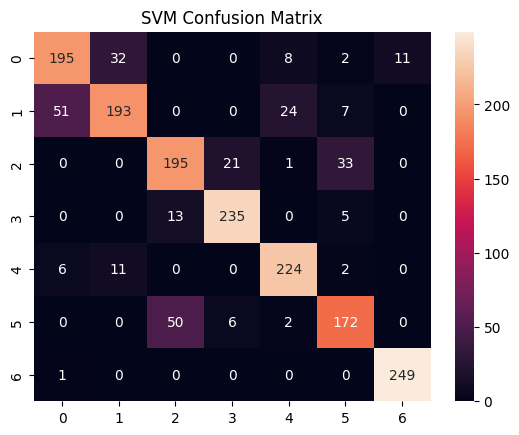

In [4]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='rbf')  # RBF kernel is good for non-linear problems
svm_model.fit(X_train, y_train)

# Predict and evaluate
svm_preds = svm_model.predict(X_test)

print("SVM Classification Report:\n", classification_report(y_test, svm_preds))
sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, fmt='d')
plt.title("SVM Confusion Matrix")
plt.show()


Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           1       0.39      0.20      0.27       248
           2       0.56      0.03      0.06       275
           3       0.56      0.71      0.63       250
           4       0.70      0.93      0.80       253
           5       0.66      0.73      0.69       243
           6       0.84      0.20      0.33       230
           7       0.40      1.00      0.57       250

    accuracy                           0.54      1749
   macro avg       0.59      0.54      0.48      1749
weighted avg       0.58      0.54      0.47      1749



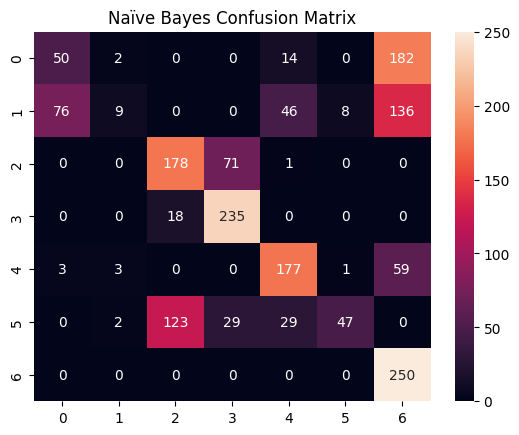

In [5]:
from sklearn.naive_bayes import GaussianNB

# Train Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
nb_preds = nb_model.predict(X_test)

print("Naïve Bayes Classification Report:\n", classification_report(y_test, nb_preds))
sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d')
plt.title("Naïve Bayes Confusion Matrix")
plt.show()


In [7]:
# Convert labels to int (important for TensorFlow)
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np

# Ensure labels are integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Filter out samples with invalid labels (>= 7)
valid_indices = y_train < 7
X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

# Create the model for 7 classes
dnn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

# Compile the model
dnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = dnn_model.fit(X_train, y_train, epochs=20, validation_split=0.2)


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5056 - loss: 1.3400 - val_accuracy: 0.6872 - val_loss: 0.7052
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7154 - loss: 0.6451 - val_accuracy: 0.7540 - val_loss: 0.5891
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7429 - loss: 0.5624 - val_accuracy: 0.7515 - val_loss: 0.5527
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7788 - loss: 0.5024 - val_accuracy: 0.7698 - val_loss: 0.5273
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7944 - loss: 0.4747 - val_accuracy: 0.7723 - val_loss: 0.5188
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8088 - loss: 0.4408 - val_accuracy: 0.7840 - val_loss: 0.4951
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8097 - loss: 0.4179 - val_accuracy: 0.7907 - val_loss: 0.4966
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8361 - loss: 0.3967 - val_accuracy: 0.